# 지도학습
지도 학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용해야한다.
이런 입력/출력 샘플 데이터, 즉 훈련 세트로부터 머신러닝 모델을 만든다.
우리의 목표는 이전에 본적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것이다.
지도 학습은 종종 훈련 데이터를 만드는 데 사람의 노력이 필요하지만 자동화하면 힘들고 어려운 작업의 속도를 높일 수 있다.

## 분류와 회귀
분류 - 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는것.
이진 분류와 다중 분류로 나뉜다.
회귀 - 연속적인 숫자, 또는 부동소수점수를 예측하는 것.
어떤사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는것이 회귀문제의 한 예이다.


Text(0, 0.5, 'second characteristic')

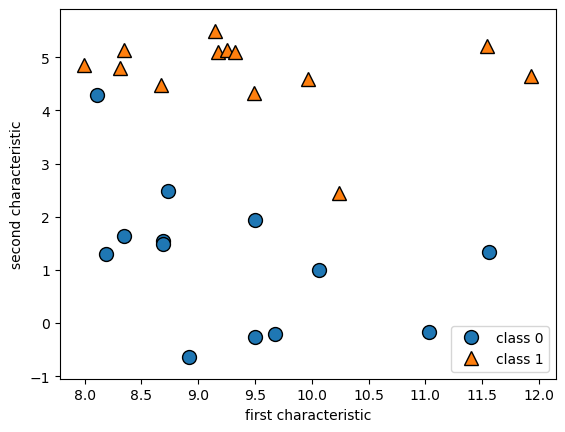

In [17]:
import mglearn
import matplotlib.pyplot as plt
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
plt.legend(["class 0","class 1"],loc=4)
plt.xlabel("first characteristic")
plt.ylabel("second characteristic")
# print("X.shape",X.shape)

Text(0, 0.5, 'target')

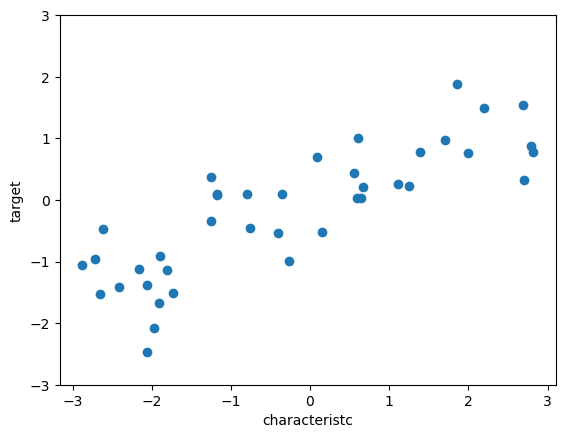

In [18]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("characteristc")
plt.ylabel("target")


In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())
print(cancer.DESCR)


cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest v

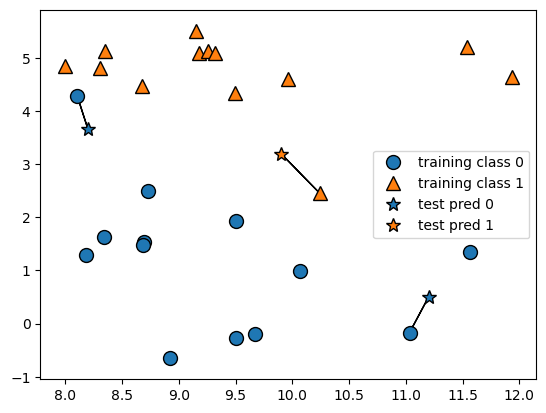

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

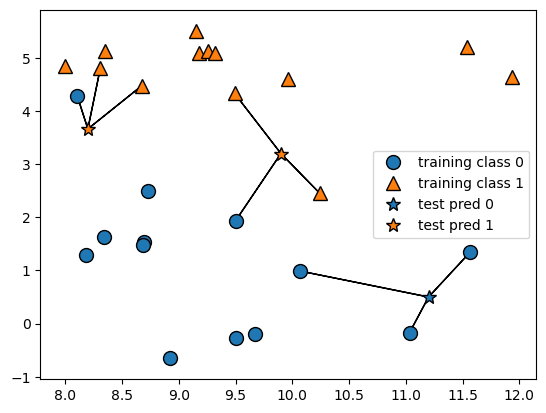

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

print("테스트 세트 예측 : ",clf.predict(X_test))
print("테스트 세트 정확도 :{:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 예측 :  [1 0 1 0 1 0 0]
테스트 세트 정확도 :0.86


[ 9.96346605 11.0329545  11.54155807  8.69289001  8.1062269   8.30988863
 11.93027136  9.67284681  8.34810316  8.67494727  9.17748385 10.24028948
  8.68937095  8.92229526  9.49123469  9.25694192  7.99815287  8.18378052
  8.7337095   9.32298256 10.06393839  9.50048972  8.34468785  9.50169345
  9.15072323 11.563957  ]
[ 4.59676542 -0.16816717  5.21116083  1.54322016  4.28695977  4.80623966
  4.64866327 -0.20283165  5.13415623  4.47573059  5.09283177  2.45544401
  1.48709629 -0.63993225  4.33224792  5.13284858  4.8525051   1.29564214
  2.49162431  5.09840649  0.99078055 -0.26430318  1.63824349  1.93824624
  5.49832246  1.3389402 ]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


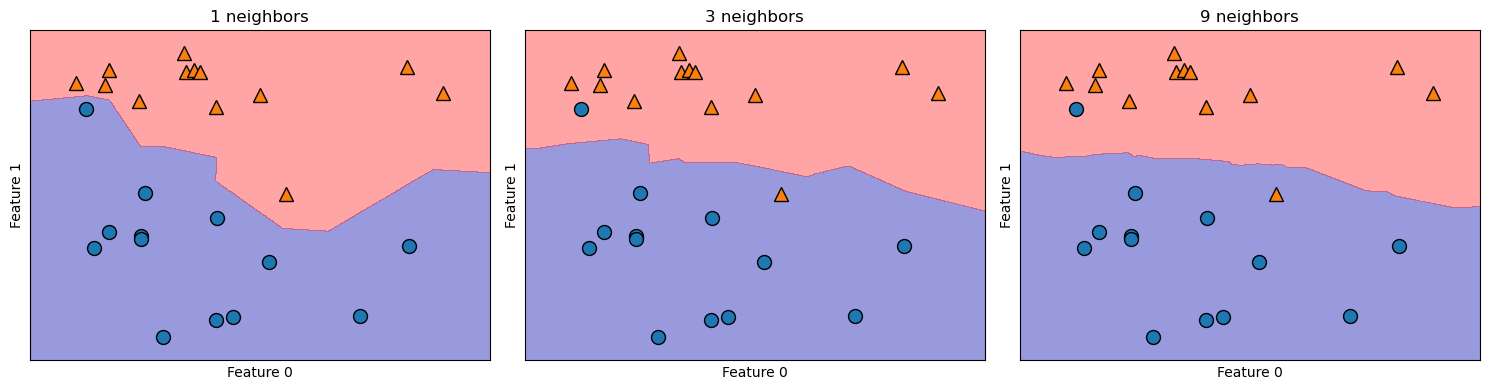

In [38]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier

# Forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 3개의 서브플롯: n_neighbors = 1, 3, 9
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)

    # 결정 경계 시각화
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

    ax.set_title(f"{n_neighbors} neighbors")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

plt.tight_layout()
plt.show()


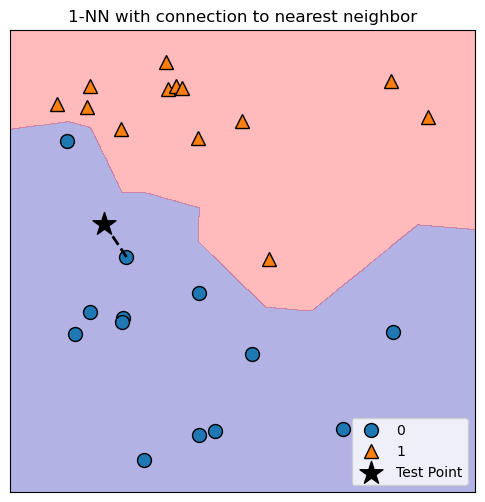

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances

# 데이터 생성
X, y = mglearn.datasets.make_forge()
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

# 테스트할 좌표 하나 지정 (왼쪽 위 모서리 근처 점)
test_point = np.array([[8.5, 3.0]])  # 너가 보고 있는 영역 위치에 맞게 조절 가능

# 가장 가까운 이웃 찾기
distances = euclidean_distances(test_point, X)[0]
nearest_index = np.argsort(distances)[:1]  # k=1 이므로 한 개만 선택

# 시각화
fig, ax = plt.subplots(figsize=(6, 6))
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
ax.scatter(test_point[:, 0], test_point[:, 1], marker="*", s=300, c="black", label="Test Point")

# 연결선 그리기
for idx in nearest_index:
    x_vals = [test_point[0, 0], X[idx, 0]]
    y_vals = [test_point[0, 1], X[idx, 1]]
    ax.plot(x_vals, y_vals, "k--", lw=2)

ax.legend()
ax.set_title("1-NN with connection to nearest neighbor")
plt.show()


## 결정경계를 그리는 알고리즘 직접 구현

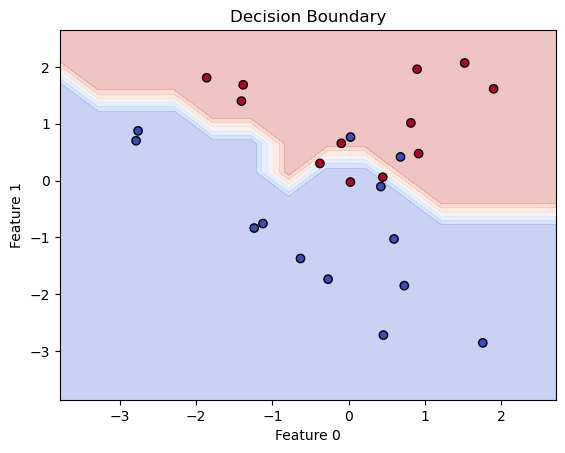

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# 데이터셋 생성
X, y = make_classification(n_samples=25, n_features=2, n_classes=2, n_redundant=0, random_state=42)
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X, y)

# --- 직접 구현한 결정 경계 시각화 --- #
def plot_decision_boundary(model, X, y, eps=0.1):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 1. 격자 만들기 (meshgrid)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

    # 2. meshgrid 좌표를 (N, 2) 모양으로 변환
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # 3. 각 좌표에 대해 예측값 구하기
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # 4. 배경 색칠
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # 5. 실제 데이터 점 찍기
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.title("Decision Boundary")
    plt.show()

# 함수 실행
plot_decision_boundary(clf, X, y, eps=0.5)


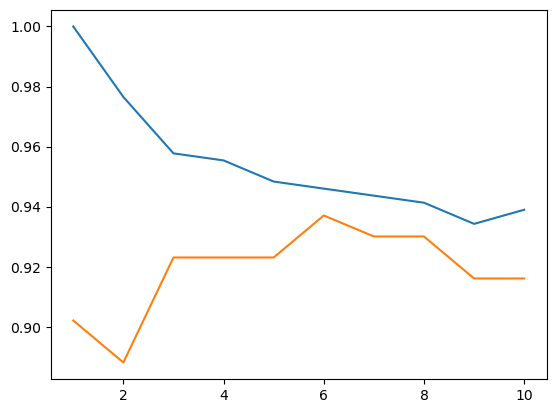

In [67]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy = []
test_accuracy = []


#1에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1,11)


for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train,y_train)
    #훈련세트 정확도 저장
    training_accuracy.append(clf.score(x_train,y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(x_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")

